<a href="https://colab.research.google.com/github/403411365LTF/107-2-Multimedia/blob/master/Keras_Mnist_MLP_h1000_DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

#將「輸入層」與「隱藏層」加入模型

model.add(Dense(units=1000,
  input_dim=784,
  kernel_initializer='normal',
  activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=10,
  kernel_initializer='normal',
  activation='softmax'))

print(model.summary())

W0616 08:07:25.065609 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 08:07:25.090631 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 08:07:25.093726 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0616 08:07:25.110959 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 08:07:25.121053 13

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
  y=y_Train_OneHot,validation_split=0.2,
  epochs=10, batch_size=200,verbose=2)

W0616 08:07:35.027387 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 08:07:35.062540 139779508348800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0616 08:07:35.160165 139779508348800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3607 - acc: 0.8925 - val_loss: 0.1624 - val_acc: 0.9545
Epoch 2/10
 - 8s - loss: 0.1603 - acc: 0.9527 - val_loss: 0.1174 - val_acc: 0.9660
Epoch 3/10
 - 8s - loss: 0.1167 - acc: 0.9651 - val_loss: 0.0993 - val_acc: 0.9711
Epoch 4/10
 - 7s - loss: 0.0930 - acc: 0.9722 - val_loss: 0.0907 - val_acc: 0.9723
Epoch 5/10
 - 7s - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0820 - val_acc: 0.9760
Epoch 6/10
 - 7s - loss: 0.0631 - acc: 0.9797 - val_loss: 0.0772 - val_acc: 0.9768
Epoch 7/10
 - 8s - loss: 0.0542 - acc: 0.9836 - val_loss: 0.0790 - val_acc: 0.9767
Epoch 8/10
 - 7s - loss: 0.0483 - acc: 0.9858 - val_loss: 0.0725 - val_acc: 0.9784
Epoch 9/10
 - 8s - loss: 0.0438 - acc: 0.9859 - val_loss: 0.0681 - val_acc: 0.9798
Epoch 10/10
 - 8s - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0663 - val_acc: 0.9803


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

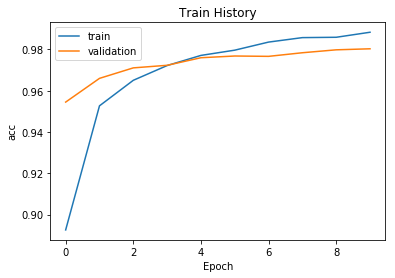

In [6]:
show_train_history(train_history,'acc','val_acc')

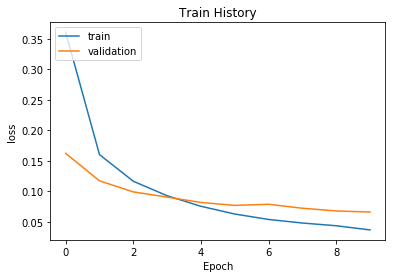

In [7]:
show_train_history(train_history,'loss','val_loss')


In [8]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 92us/step

accuracy= 0.9813


In [9]:
prediction=model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6])

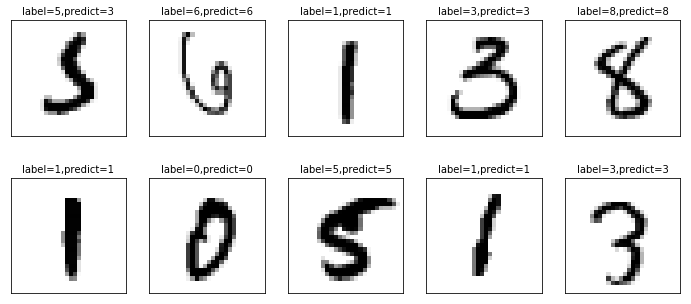

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
    prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title= "label=" +str(labels[idx])
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
      
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
  
plot_images_labels_prediction(x_test_image,y_test_label,
  prediction,idx=340)

In [11]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,0,2,1,0,1,1,3,0
1,0,1128,3,0,0,0,1,0,3,0
2,5,1,1006,5,4,0,2,6,3,0
3,1,0,0,999,0,2,0,4,2,2
4,0,0,4,0,969,0,1,0,2,6
5,3,0,0,15,1,858,6,2,6,1
6,5,3,0,1,7,3,936,0,3,0
7,2,5,7,1,0,0,0,1005,4,4
8,5,0,2,8,5,2,2,2,945,3


In [12]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [13]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


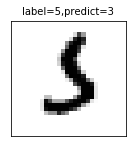

In [14]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=340,num=1)

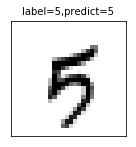

In [15]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=1289,num=1)